In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\LENOVO\Downloads\train_NIR5Yl1.csv')

In [3]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
data.shape

(330045, 7)

In [5]:
data=data.drop(columns=['ID'])

In [6]:
data.isnull().sum()

Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [7]:
data.corr()

,Reputation,Answers,Username,Views,Upvotes
Reputation,1.000000,0.066504,-0.041019,0.036455,0.266710
Answers,0.066504,1.000000,-0.012197,0.498642,0.202033
Username,-0.041019,-0.012197,1.000000,0.002306,-0.011970
Views,0.036455,0.498642,0.002306,1.000000,0.437336
Upvotes,0.266710,0.202033,-0.011970,0.437336,1.000000


In [8]:
data=data.drop(columns=['Username'])

In [9]:
test=pd.read_csv(r'C:\Users\LENOVO\Downloads\test_8i3B3FC.csv')
t=pd.read_csv(r'C:\Users\LENOVO\Downloads\test_8i3B3FC.csv')

In [10]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [11]:
test.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [12]:
test=test.drop(columns=['ID','Username'])

In [13]:
df=pd.concat([data,test],axis=0)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
df.shape

(471493, 5)

In [15]:
df.dtypes

Answers       float64
Reputation    float64
Tag            object
Upvotes       float64
Views         float64
dtype: object

In [16]:
df['Tag'].unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [17]:
dummies=pd.get_dummies(df['Tag'],drop_first=True)

In [18]:
dummies

,c,h,i,j,o,p,r,s,x
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
141443,0,0,0,1,0,0,0,0,0
141444,0,0,0,1,0,0,0,0,0
141445,0,0,0,0,0,1,0,0,0
141446,0,0,0,0,1,0,0,0,0


In [19]:
df=pd.concat([df,dummies],axis=1)

In [20]:
df.shape

(471493, 14)

In [21]:
df=df.drop(columns=['Tag'])

In [22]:
train=df.iloc[:330045,:]
test=df.iloc[330045:,:]

In [23]:
train.isnull().sum()

Answers       0
Reputation    0
Upvotes       0
Views         0
c             0
h             0
i             0
j             0
o             0
p             0
r             0
s             0
x             0
dtype: int64

In [24]:
test.isnull().sum()

Answers            0
Reputation         0
Upvotes       141448
Views              0
c                  0
h                  0
i                  0
j                  0
o                  0
p                  0
r                  0
s                  0
x                  0
dtype: int64

In [25]:
test=test.drop(columns=['Upvotes'])

In [26]:
x=train.drop(columns=['Upvotes'])
y=train['Upvotes']

In [27]:
y.shape

(330045,)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
test=sc.fit_transform(test)
y=sc.fit_transform(y.values.reshape(-1,1))

In [29]:
print(x)

[[-0.53573597 -0.14157253 -0.26915833 ... -0.19792598 -0.27575268
  -0.14696678]
 [ 2.25794312  0.67523751  0.32308687 ... -0.19792598 -0.27575268
  -0.14696678]
 [ 0.02299985 -0.23705919 -0.26653963 ... -0.19792598 -0.27575268
  -0.14696678]
 ...
 [-0.53573597 -0.05894553 -0.33588566 ... -0.19792598 -0.27575268
  -0.14696678]
 [-0.53573597 -0.2839526  -0.34015957 ... -0.19792598 -0.27575268
  -0.14696678]
 [ 0.02299985 -0.21329838 -0.33463807 ... -0.19792598 -0.27575268
  -0.14696678]]


In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(xtrain,ytrain)
y_pred=regressor.predict(xtest)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ytest,y_pred))

0.11543482491621818


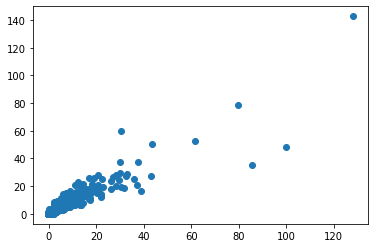

In [33]:
plt.scatter(ytest,y_pred)
plt.show()

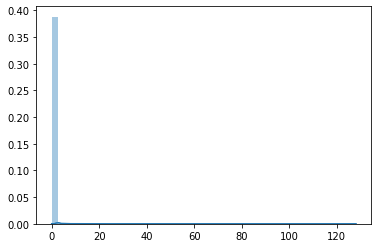

In [34]:
sns.distplot(ytest)

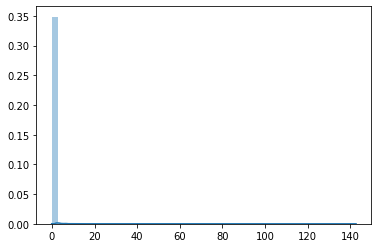

In [35]:
sns.distplot(y_pred)

In [36]:
y_pred=regressor.predict(test)

In [37]:
y_pred=sc.inverse_transform(y_pred)

In [38]:
y_pred

array([191.85      ,  90.7       ,  33.075     , ...,  55.05      ,
        46.11428571,  16.00677489])

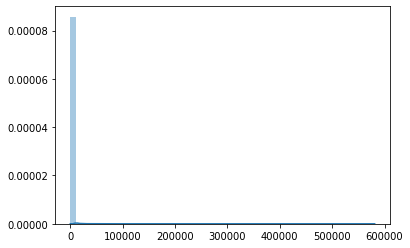

In [39]:
sns.distplot(y_pred)

In [43]:
submission=pd.DataFrame({'ID':t['ID'],'Upvotes':y_pred})

In [44]:
submission.head()

,ID,Upvotes
0,366953,191.850000
1,71864,90.700000
2,141692,33.075000
3,316833,78.320000
4,440445,291.728571


In [45]:
filename = 'Upvote Submission.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Upvote Submission.csv
